In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/house_price.csv')

In [3]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
df = df.select_dtypes(include=[np.number])

In [5]:
target_col = "House_Price"  
X = df.drop(columns=[target_col])
y = df[target_col]

In [6]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
class RegressionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
class RegressionTreeScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._build_tree(X, y, depth=0)
    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            np.unique(y).size == 1):
            return RegressionTreeNode(value=np.mean(y))
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return RegressionTreeNode(value=np.mean(y))
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_child = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        return RegressionTreeNode(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)
        
    def _best_split(self, X, y):
        best_mse = float("inf")
        best_feature = None
        best_threshold = None
        n_samples, n_features = X.shape
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() == 0 or right_mask.sum() == 0:
                    continue
                mse = self._weighted_mse(y[left_mask], y[right_mask])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold
    def _weighted_mse(self, y_left, y_right):
        n = len(y_left) + len(y_right)
        return (
            len(y_left) / n * np.var(y_left) +
            len(y_right) / n * np.var(y_right)
        )
    def predict(self, X):
        X = np.array(X)
        return np.array([self._traverse_tree(x, self.root) for x in X])
    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

In [10]:
tree = RegressionTreeScratch(max_depth=5, min_samples_split=10)
tree.fit(X_train.values, y_train.values)
y_pred_tree = tree.predict(X_test.values)

In [11]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Regression Tree Metrics")
print("MSE :", mse_tree)
print("RMSE:", rmse_tree)
print("MAE :", mae_tree)
print("R2  :", r2_tree)

Regression Tree Metrics
MSE : 1296716043.1804504
RMSE: 36009.94367088694
MAE : 29038.875905566187
R2  : 0.979883043203107


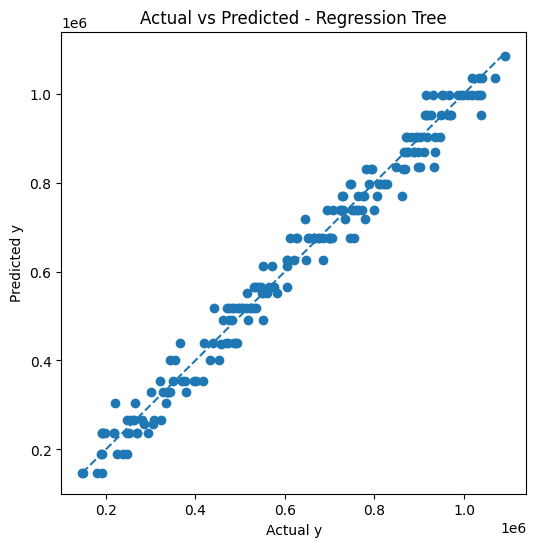

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_tree)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.title("Actual vs Predicted - Regression Tree")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.show()

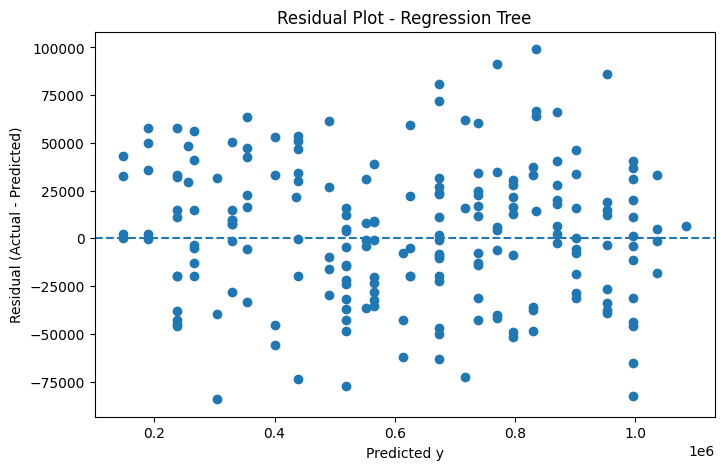

In [13]:
residuals_tree = y_test.values - y_pred_tree
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_tree, residuals_tree)
plt.axhline(0, linestyle='--')
plt.title("Residual Plot - Regression Tree")
plt.xlabel("Predicted y")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

In [14]:
tree_results = pd.DataFrame([{
    "Model": "Regression Tree",
    "MSE": mse_tree,
    "RMSE": rmse_tree,
    "MAE": mae_tree,
    "R2": r2_tree,
    "Max Depth": 5,
    "Min Samples Split": 10
}])
tree_results

,Model,MSE,RMSE,MAE,R2,Max Depth,Min Samples Split
0,Regression Tree,1.296716e+09,36009.943671,29038.875906,0.979883,5,10
